# Using Keras on the Fashion MNIST Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install deap #https://deap.readthedocs.io/en/master/overview.html

# algo
import tensorflow as tf
from tensorflow import keras

# data
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

     |████████████████████████████████| 163kB 2.8MB/s 


Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


In [3]:
# version check
print(f'Tensorflow Version: {tf.__version__}')
print(f'Keras Version:      {keras.__version__}')

Tensorflow Version: 2.2.0
Keras Version:      2.3.0-tf


### Data review

In [4]:
# data review
X_train_full.shape
#y_train_full.shape

(60000, 28, 28)

In [0]:
# scale input features to 0-1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
#
key = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
key[0]

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train]

TypeError: ignored

### Sequential API

In [0]:
#
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation='relu'),
                                keras.layers.Dense(100, activation='relu'),
                                keras.layers.Dense(10, activation='softmax')])


In [11]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
#
model.layers

In [13]:
# layer review
hidden1 = model.layers[1]
hidden1.name

'dense'

In [78]:
model.get_layer('dense') is hidden1

True

In [14]:
#
weights, biases = hidden1.get_weights()

print(f'weights shape:  {weights.shape}')
print(f'biases shape:   {biases.shape}')

weights shape:  (784, 300)
biases shape:   (300,)


### Compile the model

In [0]:
#
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Fit the model to the selected data

In [17]:
# store history of model epochs
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7173 - accuracy: 0.7665 - val_loss: 0.5186 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4906 - accuracy: 0.8289 - val_loss: 0.4447 - val_accuracy: 0.8462
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8438 - val_loss: 0.4259 - val_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4179 - accuracy: 0.8538 - val_loss: 0.4022 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8601 - val_loss: 0.3824 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8666 - val_loss: 0.3871 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8705 - val_loss: 0.3752 - val_accuracy:

### plot learning metrics

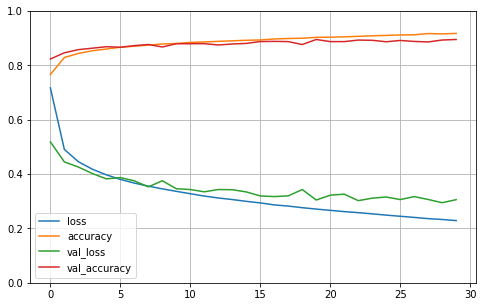

{'verbose': 1, 'epochs': 30, 'steps': 1719}


In [18]:
# plt model metrics
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(f'{history.params}')

In [19]:
# evaluate model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 72.4459 - accuracy: 0.8365


[72.44586181640625, 0.8364999890327454]

In [0]:
# save model
model.save('FMNIST-SGD-two-dense-model.h5')

### Hyperparameter tuning

In [0]:
# function to 
def build_model(n_hidden=1, n_neurons=30, eta=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layers in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=eta)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [0]:
#
keras_clf = keras